1. Uploading and Reading the Data

*   Uploading the crime data CSV file.
*   Loading the data into a pandas DataFrame and printing the columns.

In [1]:
import pandas as pd

from google.colab import files
uploaded = files.upload()

df = pd.read_csv('crimedataexp.csv')

Saving crimedataexp.csv to crimedataexp.csv


In [2]:

print(df.columns)


Index(['Report Number', 'Date Reported', 'Time Reported', 'Date of Occurrence',
       'Time of Occurrence', 'City', 'Crime Code', 'Crime Description',
       'Victim Age', 'Victim Gender', 'Weapon Used', 'Crime Domain',
       'Police Deployed', 'Case Closed', 'Date Case Closed',
       'Time Case Closed'],
      dtype='object')


In [3]:
df.head()

/usr/local/lib/python3.10/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Report Number,Date Reported,Time Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Time Case Closed
0,1,02-01-2020,0.0,01-01-2020,1.11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN,NaN
1,2,01-01-2020,19.0,01-01-2020,6.26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN,NaN
2,3,02-01-2020,5.0,01-01-2020,14.30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN,NaN
3,4,01-01-2020,5.0,01-01-2020,14.46,Pune,170,BURGLARY,49,F,Firearm,Other Crime,1,Yes,29-04-2020,5.0
4,5,01-01-2020,21.0,01-01-2020,16.51,Pune,421,VANDALISM,30,F,Other,Other Crime,18,Yes,08-01-2020,21.0


2. Converting Time Columns to Timedelta Format

*   Converting the 'Time Reported', 'Time of Occurrence', and 'Time Case Closed' columns to timedelta format.

In [4]:
# Function to convert hour.second to hh:mm:ss
def convert_time_to_timedelta(time_str):
    if pd.isna(time_str) or time_str == '':
        return pd.NaT  # Return NaT for missing values
    # Split hour and minute
    try:
        hour, minute = map(int, time_str.split('.'))
        return pd.to_timedelta(f"{hour}:{minute}:00")  # Create timedelta
    except ValueError:
        return pd.NaT  # Return NaT if there's an error in conversion

# Convert time columns to timedelta format
df['Time Reported'] = df['Time Reported'].astype(str).apply(convert_time_to_timedelta)
df['Time of Occurrence'] = df['Time of Occurrence'].astype(str).apply(convert_time_to_timedelta)
df['Time Case Closed'] = df['Time Case Closed'].astype(str).apply(lambda x: convert_time_to_timedelta(x) if x != 'nan' else pd.NaT)

print(df[['Time Reported', 'Time of Occurrence', 'Time Case Closed']].head())

    Time Reported Time of Occurrence Time Case Closed
0 0 days 00:00:00    0 days 01:11:00              NaT
1 0 days 19:00:00    0 days 06:26:00              NaT
2 0 days 05:00:00    0 days 14:03:00              NaT
3 0 days 05:00:00    0 days 14:46:00  0 days 05:00:00
4 0 days 21:00:00    0 days 16:51:00  0 days 21:00:00


3. Handling Date and Time Data

*   Converting 'Date of Occurrence' to a pandas datetime object with automatic error handling.
*   Dropping rows with missing 'Date of Occurrence'.
*   Extracting the 'Year' from the 'Date of Occurrence' column.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Try converting with automatic inference, handling errors by setting invalid dates to NaT
df['Date of Occurrence'] = pd.to_datetime(df['Date of Occurrence'], errors='coerce', dayfirst=True)

# Drop rows with NaT in 'Date of Occurrence' if necessary
df = df.dropna(subset=['Date of Occurrence'])

# Extract the year
df['Year'] = df['Date of Occurrence'].dt.year

# Group by Year and Victim Gender, and fill missing values with 0
victim_gender_yearly = df.groupby(['Year', 'Victim Gender']).size().unstack(fill_value=0)


4. Visualization of Victim Gender Over the Years

*   Grouping crime data by year and victim gender.
*   Plotting a stacked bar plot to visualize the number of male and female victims over the years.


<Figure size 1200x600 with 0 Axes>

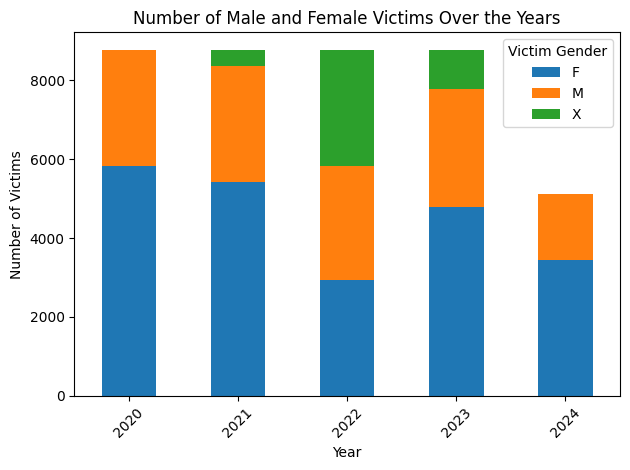

In [10]:
plt.figure(figsize=(12, 6))

# bar plot
victim_gender_yearly.plot(kind='bar', stacked=True)

plt.title('Number of Male and Female Victims Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Victims')
plt.xticks(rotation=45)
plt.legend(title='Victim Gender')
plt.tight_layout()

plt.savefig('victim_gender_distribution.png', format='png')

plt.show()

In [ ]:
plt.savefig('victim_gender_distribution.webp', format='webp')


<Figure size 640x480 with 0 Axes>

In [ ]:
import json

# Create a dictionary to hold the data for JSON
victim_data = {}

# Populate the dictionary with data using original codes
for year, data in victim_gender_yearly.iterrows():
    male_crimes = data.get('M', 0)  # Use 'M' for Male
    female_crimes = data.get('F', 0)  # Use 'F' for Female
    others_crimes = data.get('X', 0)  # Use 'X' for Others

    # Add to the dictionary
    victim_data[year] = {
        'Male Crimes': male_crimes,
        'Female Crimes': female_crimes,
        'Others Crimes': others_crimes
    }

# Save the dictionary to a JSON file
with open('victim_gender_yearly.json', 'w') as json_file:
    json.dump(victim_data, json_file, indent=4)

print("Data saved to victim_gender_yearly.json")

Data saved to victim_gender_yearly.json


5. Total Crimes Reported Over the Years

*   Grouping by year to get total crime counts.
*  Plotting a line graph to show total crimes reported over the years.

In [ ]:
# Group by 'Year' to get yearly crime counts
yearly_crime_counts = df.groupby('Year').size()
print(yearly_crime_counts)


Year
2020    8769
2021    8761
2022    8765
2023    8758
2024    5107
dtype: int64


In [ ]:
# Save yearly_crime_counts as a JSON file after you calculate it in your Colab notebook
import json

# Assuming yearly_crime_counts is a pandas Series with years as the index
yearly_crime_counts_dict = yearly_crime_counts.to_dict()
with open('yearly_crime_counts.json', 'w') as f:
    json.dump(yearly_crime_counts_dict, f)


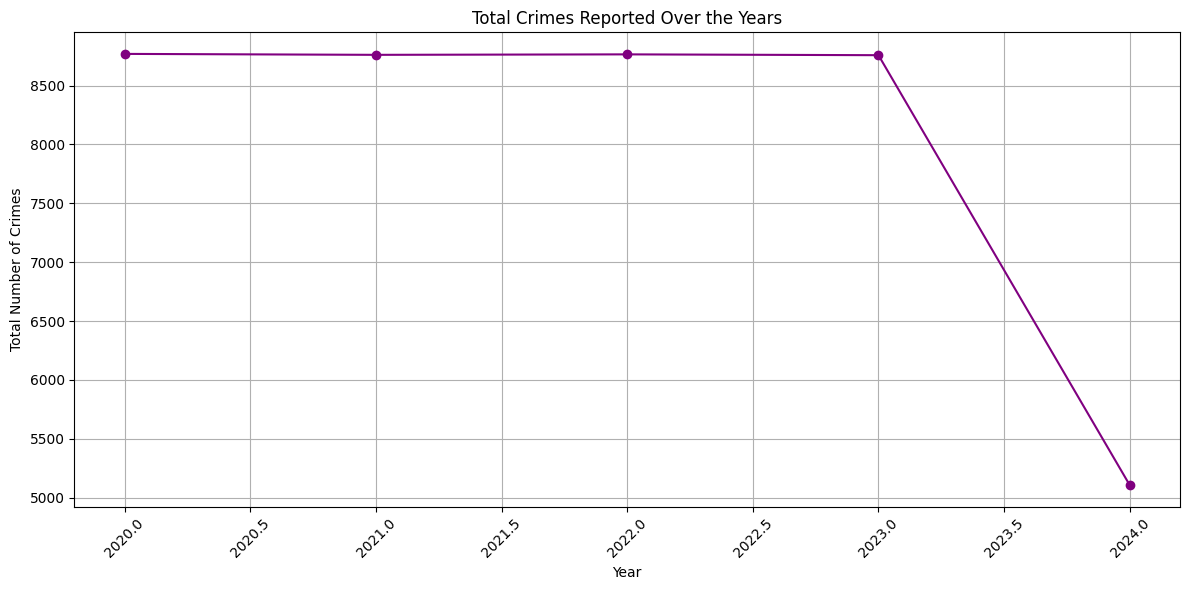

In [ ]:
# Count total crimes per year
total_crimes_yearly = df.groupby('Year').size()

# Plot total crimes over the years
plt.figure(figsize=(12, 6))
total_crimes_yearly.plot(kind='line', marker='o', color='purple')
plt.title('Total Crimes Reported Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Number of Crimes')
plt.xticks(rotation=45)
plt.grid()
plt.tight_layout()
plt.show()



6. Crime Prediction Using Polynomial Regression

*   Filtering the crime data to include years from 2020 to 2023.
*   Preparing and fitting a polynomial regression model to forecast crime counts for future years.
*   Visualizing historical and future predictions for crime rates.

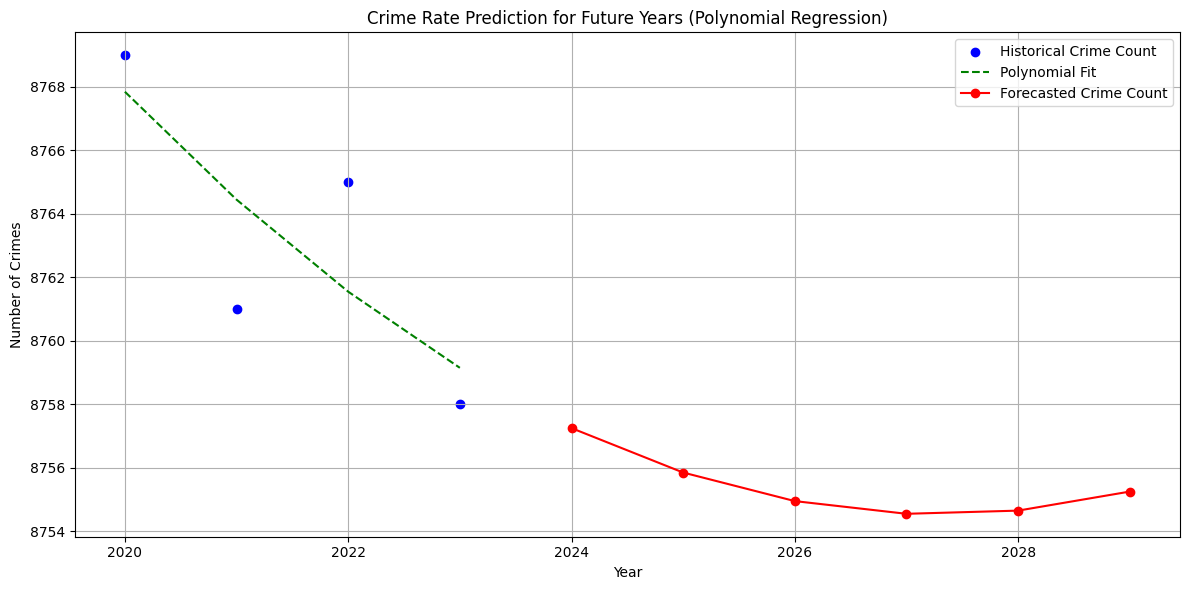

Predicted crime count for 2024: 8757
Predicted crime count for 2025: 8756
Predicted crime count for 2026: 8755
Predicted crime count for 2027: 8755
Predicted crime count for 2028: 8755
Predicted crime count for 2029: 8755


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

# Assuming total_crimes_yearly is already defined
# Filter the data to include only years from 2020 to 2023
historical_data = total_crimes_yearly.loc[total_crimes_yearly.index.isin([2020, 2021, 2022, 2023])]

# Prepare the data for polynomial regression
X = historical_data.index.values.reshape(-1, 1)  # Year as independent variable
y = historical_data.values  # Total crimes as dependent variable

# Create polynomial features
degree = 2  # You can adjust the degree based on your needs
poly = PolynomialFeatures(degree=degree)
X_poly = poly.fit_transform(X)

# Fit the polynomial regression model
model = LinearRegression()
model.fit(X_poly, y)

# Make predictions for 2024 to 2029
future_years = np.array([2024, 2025, 2026, 2027, 2028, 2029]).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot historical and future predictions
plt.figure(figsize=(12, 6))
plt.scatter(X, y, label="Historical Crime Count", color='blue')
plt.plot(X, model.predict(X_poly), color='green', label="Polynomial Fit", linestyle='--')
plt.plot(future_years, future_predictions, color='red', label="Forecasted Crime Count", marker='o')
plt.title("Crime Rate Prediction for Future Years (Polynomial Regression)")
plt.xlabel("Year")
plt.ylabel("Number of Crimes")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# Display future predictions
for year, count in zip(future_years.flatten(), future_predictions):
    print(f"Predicted crime count for {year}: {count:.0f}")


In [ ]:
import json

# Creating a dictionary of predicted values for years 2024-2029
predicted_data = {str(year): int(count) for year, count in zip(future_years.flatten(), future_predictions)}

# Save the predictions to a JSON file in the current working directory
with open('predicted_crime_counts.json', 'w') as json_file:
    json.dump(predicted_data, json_file)

print("Predicted values saved to predicted_crime_counts.json")


Predicted values saved to predicted_crime_counts.json


In [ ]:
# Save the Linear Regression model to a file
import joblib  # Import joblib to save the model
model_filename = 'linear_regression_model.pkl'  # Updated filename
joblib.dump(model, model_filename)
print(f"Model saved as '{model_filename}'")

No such file found: linear_regression_model.pkl
Model saved as 'polynomial_regression_model.pkl'


7. Classifying Crime Severity Based on Description

*   Defining a function to classify crime severity (Severe, Moderate, Minor) based on the crime description.
*   Applying the severity classification to create a new 'severity_label' column in the DataFrame.

In [ ]:
# Function to classify crime severity
def classify_severity(description):
    severe_crimes = ["HOMICIDE", "KIDNAPPING", "SEXUAL ASSAULT", "ROBBERY", "EXTORTION"]
    moderate_crimes = ["ASSAULT", "BURGLARY", "DRUG OFFENSE", "VEHICLE - STOLEN", "FRAUD", "ARSON", "FIREARM OFFENSE"]
    minor_crimes = ["VANDALISM", "IDENTITY THEFT", "COUNTERFEITING", "SHOPLIFTING", "PUBLIC INTOXICATION", "TRAFFIC VIOLATION", "CYBERCRIME", "ILLEGAL POSSESSION"]

    description = description.strip().upper()  # Normalize the description
    if description in severe_crimes:
        return "Severe"
    elif description in moderate_crimes:
        return "Moderate"
    elif description in minor_crimes:
        return "Minor"
    else:
        return "Unknown"

# Apply the function to create a new severity_label column
df['severity_label'] = df['Crime Description'].apply(classify_severity)

# Display the DataFrame with severity labels
print(df)

       Report Number Date Reported   Time Reported Date of Occurrence  \
0                  1    02-01-2020 0 days 00:00:00         2020-01-01   
1                  2    01-01-2020 0 days 19:00:00         2020-01-01   
2                  3    02-01-2020 0 days 05:00:00         2020-01-01   
3                  4    01-01-2020 0 days 05:00:00         2020-01-01   
4                  5    01-01-2020 0 days 21:00:00         2020-01-01   
...              ...           ...             ...                ...   
40155          40156    01-08-2024 0 days 16:00:00         2024-07-31   
40156          40157    31-07-2024 0 days 14:00:00         2024-07-31   
40157          40158    02-08-2024 0 days 03:00:00         2024-07-31   
40158          40159    01-08-2024 0 days 19:00:00         2024-07-31   
40159          40160    31-07-2024 0 days 17:00:00         2024-07-31   

      Time of Occurrence       City  Crime Code   Crime Description  \
0        0 days 01:11:00  Ahmedabad         576     

**8**. Listing Unique Cities in the Dataset

*   Extracting and displaying unique cities present in the dataset.

In [ ]:
unique_cities = df['City'].unique()

# Convert to a list for easier readability
unique_cities_list = unique_cities.tolist()

# Display the unique cities
print("Unique cities in the dataset:")
print(unique_cities_list)

Unique cities in the dataset:
['Ahmedabad', 'Chennai', 'Ludhiana', 'Pune', 'Delhi', 'Mumbai', 'Surat', 'Visakhapatnam', 'Bangalore', 'Kolkata', 'Ghaziabad', 'Hyderabad', 'Jaipur', 'Lucknow', 'Bhopal', 'Patna', 'Kanpur', 'Varanasi', 'Nagpur', 'Meerut', 'Thane', 'Indore', 'Rajkot', 'Vasai', 'Agra', 'Kalyan', 'Nashik', 'Srinagar', 'Faridabad']


9. Crime Rate per City

*   Counting the number of crimes reported per city.
*   Plotting the number of crimes per city in a bar graph.

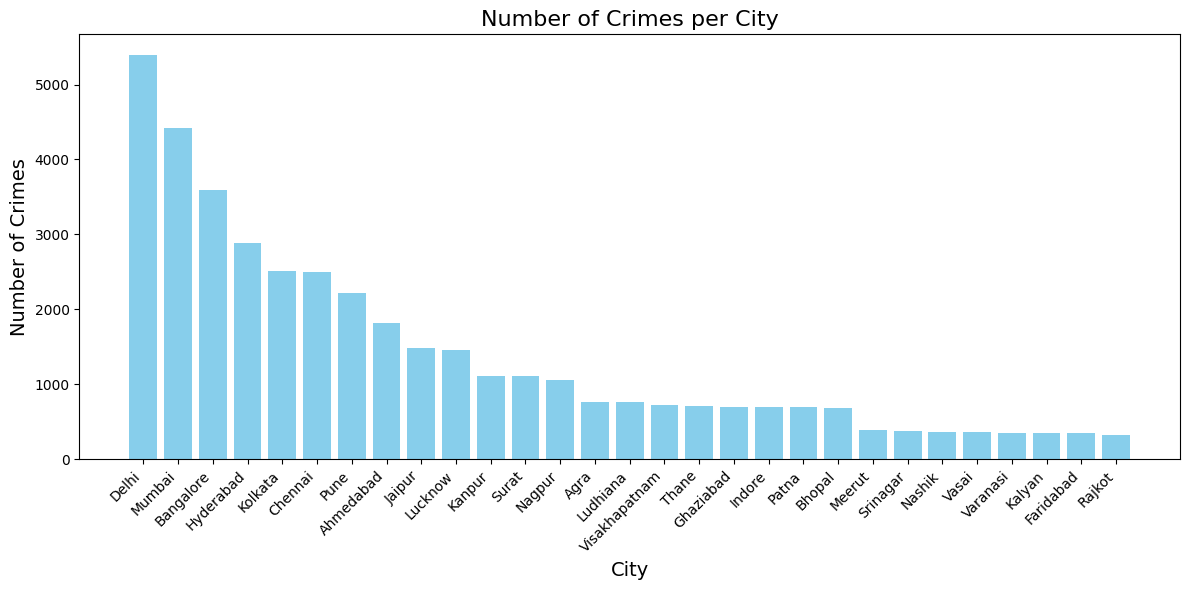

In [ ]:
# Group by 'City' and count the number of crimes
crimes_per_city = df['City'].value_counts().reset_index()
crimes_per_city.columns = ['City', 'Number of Crimes']

# Plotting the bar graph
plt.figure(figsize=(12, 6))
plt.bar(crimes_per_city['City'], crimes_per_city['Number of Crimes'], color='skyblue')
plt.xlabel('City', fontsize=14)
plt.ylabel('Number of Crimes', fontsize=14)
plt.title('Number of Crimes per City', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()